In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
import gc
import seaborn as sns
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from copy import deepcopy

In [ ]:
#!pip install textacy

     |████████████████████████████████| 200 kB 13.1 MB/s 
     |████████████████████████████████| 6.2 MB 64.2 MB/s 
     |████████████████████████████████| 481 kB 65.8 MB/s 
     |████████████████████████████████| 132 kB 66.7 MB/s 
     |████████████████████████████████| 2.0 MB 59.1 MB/s 
     |████████████████████████████████| 457 kB 66.8 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 653 kB 53.2 MB/s 
     |████████████████████████████████| 10.1 MB 58.3 MB/s 
     |████████████████████████████████| 181 kB 90.6 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.2-cp37-cp37m-linux_x86_64.whl size=1230823 sha256=a14c3270a877262a2180ff0de8f386c2bf480dfa5ba48bfe6aec9633be69f32e
  Stored in directory: /root/.cache/pip/wheels/38/70/71/ca13ea3d36ccd0b3d0ec7d7a4ca67522048d695b556bba4f59
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp37-cp37m-linux_x86_64.whl size=739

### Functions

In [ ]:
### Define All functions

In [ ]:
### Function to get top documents from each topic after topic modelling (Professor's code)
import numpy as np
from typing import List

def get_top_documents_for_each_topic(W: np.array, documents: List[str], num_docs: int = 5):
  sorted_docs = W.argsort(axis=0)[::-1]
  top_docs = sorted_docs[:num_docs].T
  per_document_totals = W.sum(axis=1)
  for topic, top_documents_for_topic in enumerate(top_docs):
    print(f"Topic {topic}")
    for doc in top_documents_for_topic:
      score = W[doc][topic]
      percent_about_topic = round(score / per_document_totals[doc] * 100, 1)
      print(f"{percent_about_topic}%", documents[doc])
    print("=" * 50)

In [ ]:
## Function to do TF-IDF Vectorization
def vectorizer(df:pd.DataFrame,min_df=0.01,max_df=0.4,ng=(2,2)):
  vectorizer = TfidfVectorizer(ngram_range=ng,\
                               min_df=min_df, max_df=max_df, stop_words="english",binary=True)
  df_1, df_terms = vectorizer.fit_transform(df.Review_Text), vectorizer.get_feature_names_out()
  df_tf_idf = pd.DataFrame(df_1.toarray(), columns=df_terms)
  return df_tf_idf

In [ ]:
### Function to get top tokens after topic modelling
from typing import List
import numpy as np

def get_top_tf_idf_tokens_for_topic(H: np.array, feature_names: List[str], num_top_tokens: int = 5):
  """
  Uses the H matrix (K components x M original features) to identify for each
  topic the most frequent tokens.
  """
  for topic, vector in enumerate(H):
    print(f"TOPIC {topic}\n")
    total = vector.sum()
    top_scores = vector.argsort()[::-1][:num_top_tokens]
    token_names = list(map(lambda idx: feature_names[idx], top_scores))
    strengths = list(map(lambda idx: vector[idx] / total, top_scores))
    
    for strength, token_name in zip(strengths, token_names):
      print(f"\b{token_name} ({round(strength * 100, 1)}%)\n")
    print(f"=" * 50)

In [ ]:
### Function to pre-process document
def preprocessing(document):
    document = document.lower()
    #document = re.sub('[\.]{2,}'," ",document)
    document = re.sub('[^a-zA-Z0-9\,\!\? \n]', '', document)
    document = re.sub(disney_pattern,'',document)
    document = re.sub(christmas_pattern,'christmas',document)
    document = re.sub(hong_kong_pattern, 'hongkong', document)
    document = re.sub(family_pattern, 'family', document)
    document = re.sub(time_pattern, 'time', document)
    document = re.sub(ride_pattern, 'ride', document)
    document = re.sub(wait_pattern, 'wait', document)
    document = re.sub(park_pattern, 'park', document)
    document = re.sub(age_pattern, 'age', document)
    return document

In [ ]:
### Function to plot graphs comparing different Branches
def plot_graph(df:pd.DataFrame,graph_title:str, horiz_label:str,ax:int) -> None:
  df['Sentiment'].value_counts().plot(kind='bar',ax=ax)
  plt.xlabel(horiz_label)
  ax.set_title(graph_title)

In [ ]:
### Split dataframe based on sentiment
def sentiment_split(df:pd.DataFrame) -> pd.DataFrame:
  df_neg = df[df['Rating']<3]
  df_pos = df[df['Rating']>=4]
  return df_neg,df_pos

In [ ]:
## Got code from: https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/
from spacy.lang.en import English
def stopword_removal(text:str) ->str:

  # Load English tokenizer, tagger, parser, NER and word vectors
  nlp = English()


  #  "nlp" Object is used to create documents with linguistic annotations.
  my_doc = nlp(text)

  # Create list of word tokens
  token_list = []
  for token in my_doc:
      token_list.append(token.text)

  from spacy.lang.en.stop_words import STOP_WORDS

  # Create list of word tokens after removing stopwords
  filtered_sentence =[] 

  for word in token_list:
      lexeme = nlp.vocab[word]
      if lexeme.is_stop == False:
          filtered_sentence.append(word) 
  text_to_return=" ".join(filtered_sentence)
  return text_to_return

In [ ]:
df = pd.read_csv('DisneylandReviews.csv',encoding = 'latin1')

In [ ]:
df.head(10)

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
5,670591897,3,2019-4,Singapore,"Have been to Disney World, Disneyland Anaheim ...",Disneyland_HongKong
6,670585330,5,2019-4,India,Great place! Your day will go by and you won't...,Disneyland_HongKong
7,670574142,3,2019-3,Malaysia,Think of it as an intro to Disney magic for th...,Disneyland_HongKong
8,670571027,2,2019-4,Australia,"Feel so let down with this place,the Disneylan...",Disneyland_HongKong
9,670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong


### Data Cleaning

In [ ]:
### Check for missing values in the dataset
df.isnull().sum()/len(df)*100

Review_ID            0.0
Rating               0.0
Year_Month           0.0
Reviewer_Location    0.0
Review_Text          0.0
Branch               0.0
dtype: float64

In [ ]:
### Drop duplicate reviews
df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')

In [ ]:
### Although we do not have NAN values, some fields for Year_Month are populated with 'missing'
df[df['Year_Month']=='missing']

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
269,647038712,4,missing,Philippines,The first thing on our agenda when we finished...,Disneyland_HongKong
282,646466731,3,missing,Singapore,Brought mum for the first time to Disneyland w...,Disneyland_HongKong
622,620580249,3,missing,Canada,I have been to Tokyo and LA Disneyland!I also ...,Disneyland_HongKong
5347,318799221,4,missing,Australia,We pre bought tickets at the hotel (same price...,Disneyland_HongKong
5799,284745152,5,missing,Philippines,Disneyland is indeed the most magical place in...,Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [ ]:
# Replace 'missing' with np.nan
df.loc[df['Year_Month']=='missing','Year_Month']=df.loc[df['Year_Month']==np.nan,'Year_Month']

In [ ]:
### create a temporary dataframe grouped by Branch and get the mode Year_Month for each branch
temp=df.groupby('Branch')['Year_Month'].transform(lambda x: x.fillna(x.mode(dropna=True)[0] \
                                                                        if not x.mode(dropna=True).empty else np.nan))

In [ ]:
### Create a dictionary to map the filled values back to original dataframe
temp_dict = pd.Series(temp.values,index=temp.index).to_dict()

In [ ]:
### Map dictionary with NaN values filled with mode Year_Month to original dataframe
df['year_month'] = df.index.map(temp_dict)

In [ ]:
df.drop('Year_Month',axis=1,inplace=True)
df.rename({'year_month':"'Year_Month"},inplace=True)

In [ ]:
### Convert year_month to datetime
df['year_month']=pd.to_datetime(df['year_month'],format='%Y-%m')

In [ ]:
### Delete temporary dataframe and dictionary
del temp_dict,temp
gc.collect()

650

In [ ]:
### Split year and month into separate columns to perform EDA, and drop the original column as it is redundant
df['Year']= df['year_month'].dt.year
df['Month']= df['year_month'].dt.month
df.drop('year_month',axis=1,inplace=True)

In [ ]:
df.head()

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Sentiment,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around _...",Disneyland_HongKong,Positive,2019,4


### EDA

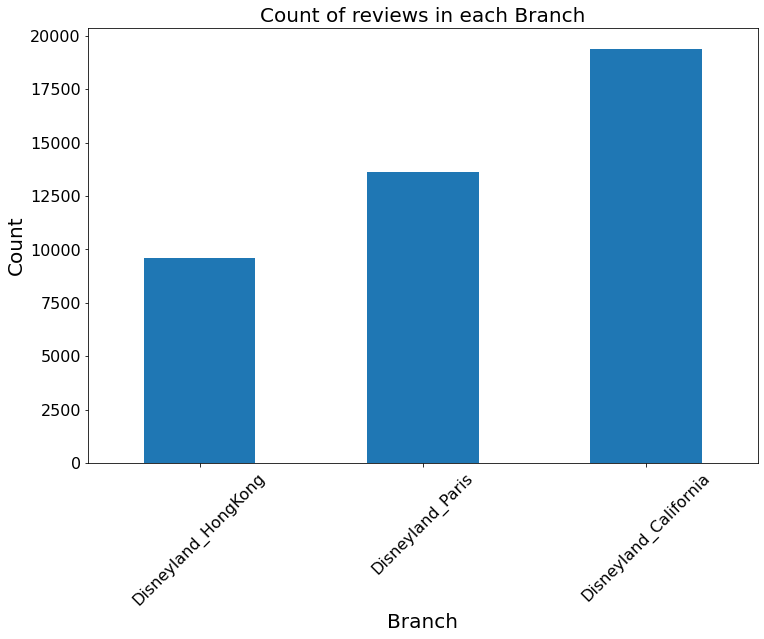

In [ ]:
df.groupby('Branch').count()['Rating'].sort_values().plot(kind='bar',figsize=(12,8))
plt.xlabel('Branch',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Count of reviews in each Branch', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16, rotation = 45)
plt.show()

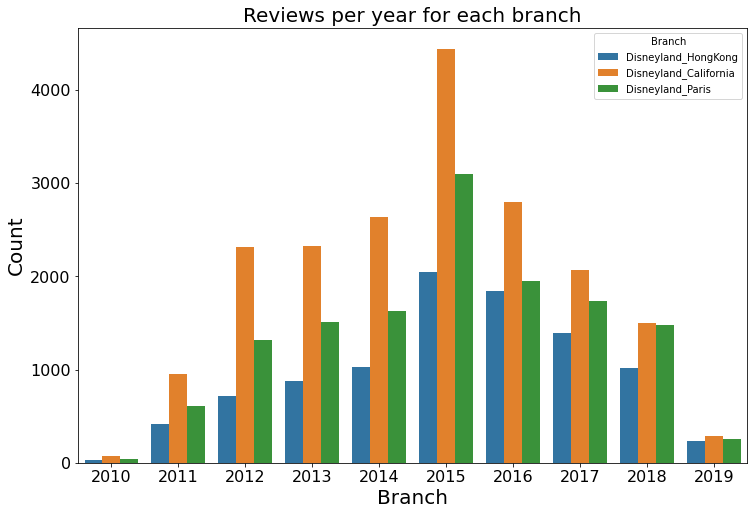

In [ ]:
### Reviews per year for each branch
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Year',hue='Branch',palette='tab10');
plt.xlabel('Branch',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Reviews per year for each branch', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

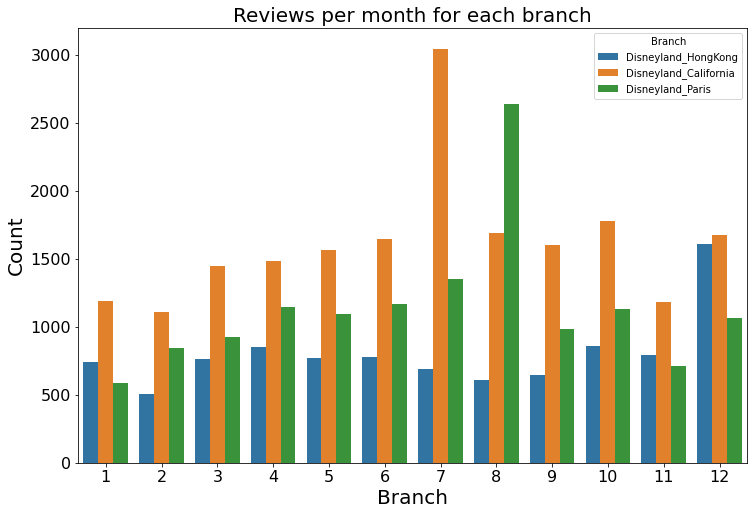

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Month',hue='Branch',palette='tab10');
plt.xlabel('Branch',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Reviews per month for each branch', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()

### Data Preprocessing

#### Stopword Removal

In [ ]:
from typing import List
import itertools
from textacy.preprocessing.resources import RE_URL
from textacy.preprocessing.resources import RE_SHORT_URL
print(f"Regex for URLs: {RE_URL}")
print(f"Regex for short URLs: {RE_SHORT_URL}")
results: List[List[str]] = df.Review_Text.str.findall(RE_URL).tolist()

parsed_urls: List[str] = list(itertools.chain(*results))
print(f"Found the following URLs: {parsed_urls}")

Regex for URLs: re.compile('(?:^|(?<![\\w/.]))(?:(?:https?://|ftp://|www\\d{0,3}\\.))(?:\\S+(?::\\S*)?@)?(?:(?!(?:10|127)(?:\\.\\d{1,3}){3})(?!(?:169\\.254|192\\.168)(?:\\.\\d{1,3}){2})(?!172\\.(?:1[6-9]|2\\d|3[0-1])(?:\\.\\d{1, re.IGNORECASE)
Regex for short URLs: re.compile('(?:^|(?<![\\w/.]))(?:(?:https?://)?)(?:\\w-?)*?\\w+(?:\\.[a-z]{2,12}){1,3}/[^\\s.,?!\'\\"|+]{2,12}(?:$|(?![\\w?!+&/]))', re.IGNORECASE)
Found the following URLs: ['www.youtube.com', 'www.wanderlustchronicles.com.au', 'www.youtube.com', 'www.youtube.com', 'www.tripadvisor.in', 'www.isitpacked.com', 'www.citystrollerrentals.com', 'www.disneytouristblog.com', 'www.dlandlive.com', 'www.undercovertourist.com', 'www.orbitz.com', 'www.parksavers.com', 'www.cheapdisneylandtickets.info', 'www.citystrollerrentals.com', 'www.facebook.com', 'www.cheapthemeparks.com', 'www.ridemax.com', 'www.mousesavers.com', 'www.ridemax.com', 'www.disneyland.com', 'www.disneyland.com', 'www.citypass.com', 'www.mousesavers.com', 'www.laughin

In [ ]:
from textacy.preprocessing.replace import urls, hashtags, numbers, emails, emojis, currency_symbols
df["Review_Text"] = df.Review_Text.\
  apply(urls).\
  apply(hashtags).\
  apply(numbers).\
  apply(currency_symbols).\
  apply(emojis).\
  apply(emails)
df.Review_Text

0        If you've ever been to Disneyland anywhere you...
1        Its been a while since d last time we visit HK...
2        Thanks God it wasn   t too hot or too humid wh...
3        HK Disneyland is a great compact park. Unfortu...
4        the location is not in the city, took around _...
                               ...                        
42651    i went to disneyland paris in july _NUMBER_ an...
42652    _NUMBER_ adults and _NUMBER_ child of _NUMBER_...
42653    My eleven year old daughter and myself went to...
42654    This hotel, part of the Disneyland Paris compl...
42655    I went to the Disneyparis resort, in _NUMBER_,...
Name: Review_Text, Length: 42632, dtype: object

In [ ]:
df

,Review_ID,Rating,Reviewer_Location,Review_Text,Branch,Sentiment,Year,Month
0,670772142,4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,Positive,2019,4
1,670682799,4,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,Positive,2019,5
2,670623270,4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,Positive,2019,4
3,670607911,4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,Positive,2019,4
4,670607296,4,United Kingdom,"the location is not in the city, took around _...",Disneyland_HongKong,Positive,2019,4
...,...,...,...,...,...,...,...,...
42651,1765031,5,United Kingdom,i went to disneyland paris in july _NUMBER_ an...,Disneyland_Paris,Positive,2015,8
42652,1659553,5,Canada,_NUMBER_ adults and _NUMBER_ child of _NUMBER_...,Disneyland_Paris,Positive,2015,8
42653,1645894,5,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,Positive,2015,8
42654,1618637,4,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,Positive,2015,8


In [ ]:
### Use Spacy stopword removal function to remove stopwords. Line of code takes a while to run, so we ran it and saved the cleaned dataframe into a new dataframe
#df['Review_Text']=df['Review_Text'].apply(stopword_removal)
#df.to_csv('Disneyland_cleaned.csv')

#### Regex Grouping

In [ ]:
df1 = pd.read_csv('Disneyland_cleaned.csv')

In [ ]:
### Dictionary of words. All words in the value of a key will be replaced with the key of the dictionary
reg_clean = {'good':["great","awesome","nice","best","perfect","good","amazing","spectacular","marvelous"],
 'pretty':["adorable","pretty","good looking","beautiful","cute","stylish","elegant"],
 'thrill' :['thrilling','exciting','adrenalinerush','adrenaline-rush','adrenaline high','rush'],
 'gift':["gift","present"],
 'happy':["pleased","satisfied","happy"],
 'bad':["terrible","pathetic","bad","cheap",'substandard','unacceptable','unpleasant','nasty','awful','inferior'],
 'dirty':["gross","dirty","disgusting"],
 'disappointed':['frustrated','disappointed','unsatisfied','not up to par','below expectations'],
 'money':['every penny','pounds','dollars','thousands of pounds','hundreds of dollars','bucks']}

In [ ]:
### Make different regex patterns to be used for pre-processing
disney_pattern= re.compile(r'\bdisney[-\s]?(?:land|world)?\b')
christmas_pattern = re.compile(r'\b(?:christ|(?:x|x{3}))[-\s]?mas\b')
hong_kong_pattern = re.compile(r'\b(?:hong kong|hong|kong|hk|mainland china)\b')
family_pattern = re.compile(r'\b(?:husband|wife|mom|dad|son(s)?|daughter(s)?|child(ren)?|kid(s)?|bab(y|ies)|sister(s)?|brother(s)?|infant|famil(y|ies)?)\b')
time_pattern = re.compile(r'\b(?:year(s)?|day(s)?|month(s)?|hour(s)?|minute(s)?|week(s)?)\b')
ride_pattern = re.compile(r'\b(?:ride(s)?)\b')
wait_pattern = re.compile(r'\b(?:wait(s|ing)?|long (line(s)?|queue(s)?))\b')
park_pattern = re.compile(r'\b(?:park(s)?|(amusement|theme)? park(s)?)\b')
age_pattern = re.compile(r'\b(?:adult|(year(s)?)? old|old)|young\b')

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_md

In [ ]:
### Apply pre-processing function
df1['Review_Text']=df1['Review_Text'].apply(preprocessing)

In [ ]:
# We noticed a few erroneous topics after one run of topic modelling, and decided to remove the below words to get better results
# (We could have added this to the pre-processing function, but we want to show that we performed topic modelling once, identified some errors and came back to fix it in the dataframe)
df1['Review_Text'] = df1['Review_Text'].str.replace('_ number _', '', flags=re.IGNORECASE)
df1['Review_Text'] = df1['Review_Text'].str.replace('number', '', flags=re.IGNORECASE)
df1['Review_Text'] = df1['Review_Text'].str.replace('hongkong', '', flags=re.IGNORECASE)

In [ ]:
df1['Review_Text']

0         find   similar layout walk main street ! fami...
1        d time visit    , time stay tomorrowland  aka ...
2        thanks god wasn    t hot humid visitingpark   ...
3          great compactpark  unfortunately bit mainten...
4        location city , took    time kowlon , family l...
                               ...                        
42627    went  paris july    thought brilliant  visited...
42628       ages    family    visited  paris beginning ...
42629    timeage family went visit family london decide...
42630    hotel ,  paris complex , wonderful place famil...
42631    went disneyparis resort ,    , small family  t...
Name: Review_Text, Length: 42632, dtype: object

In [ ]:
#All words in the value of a key will be replaced with the key of the dictionary
for k in reg_clean:
  df1['Review_Text'] = df1['Review_Text'].str.replace(r'\b(' + r'|'.join(reg_clean[k]) + r')\b\s*', str(k+' '),regex = True)

In [ ]:
df1['Review_Text']

0         find   similar layout walk main street ! fami...
1        d time visit    , time stay tomorrowland  aka ...
2        thanks god wasn    t hot humid visitingpark   ...
3          good compactpark  unfortunately bit maintena...
4        location city , took    time kowlon , family l...
                               ...                        
42627    went  paris july    thought brilliant  visited...
42628       ages    family    visited  paris beginning ...
42629    timeage family went visit family london decide...
42630    hotel ,  paris complex , wonderful place famil...
42631    went disneyparis resort ,    , small family  t...
Name: Review_Text, Length: 42632, dtype: object

In [ ]:
### Subset dataset according to region

In [ ]:
HK = df1[df1['Branch']=='Disneyland_HongKong']
paris = df1[df1['Branch']=='Disneyland_Paris']
ca = df1[df1['Branch']=='Disneyland_California']

In [ ]:
HK2 = df[df['Branch']=='Disneyland_HongKong']
paris2 = df[df['Branch']=='Disneyland_Paris']
ca2 = df[df['Branch']=='Disneyland_California']

In [ ]:
HK_neg,HK_pos = sentiment_split(HK)
paris_neg,paris_pos = sentiment_split(paris)
ca_neg,ca_pos = sentiment_split(ca)

In [ ]:
HK2_neg,HK2_pos = sentiment_split(HK2)
paris2_neg,paris2_pos = sentiment_split(paris2)
ca2_neg,ca2_pos = sentiment_split(ca2)

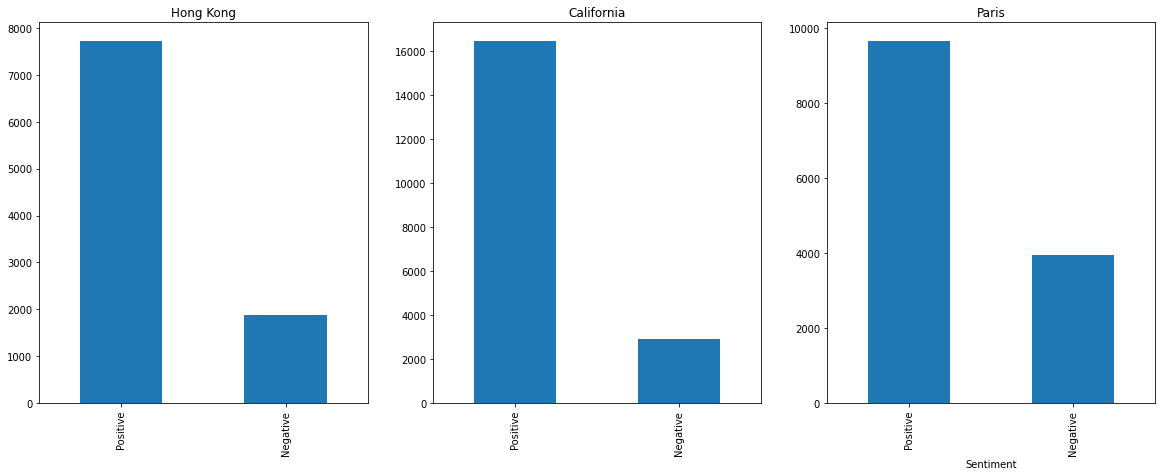

In [ ]:
# Count of positive/negative sentiment in each branch
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 7),sharey=False)
plot_graph(HK,'Hong Kong','Sentiment',axes[0])
plot_graph(ca,'California','Sentiment',axes[1])
plot_graph(paris,'Paris','Sentiment',axes[2])

### Topic Modeling

#### Hong Kong — Negative

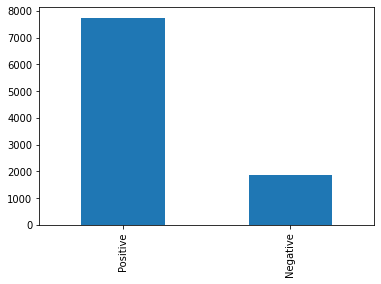

In [ ]:
HK['Sentiment'].value_counts().plot(kind='bar')

In [ ]:
HK_neg_vectorized = vectorizer(HK_neg, ng=(3,3))

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
W_HK_neg = nmf.fit_transform(HK_neg_vectorized)
H_HK_neg = nmf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
#get_top_tf_idf_tokens_for_topic(H_HK_neg, HK_neg_vectorized.columns.tolist(), 5)

In [ ]:
get_top_documents_for_each_topic(W_HK_neg, HK2_neg.Review_Text.tolist(), num_docs=10)

Topic 0
95.6% Disneyland is meant to be the happiest place on earth. Well, the one in Hong Kong must have the most exasperated parents on earth.The kids alternate between brief moments of joy and long bouts of boredom and frustration.I had expected Disneyland to be crowded and the queues long, but I was relatively hopeful that Disney's vaunted queue management systems and methods would help alleviate that. After all it's their core business. This wasn't much in evidence however. In Disneyland Hong Kong queue management appears to consist of telling the people queuing how much longer they have to wait. The information isn't even up to date. On the Slinky Dog ride in Toy Story Land I was handed a card with the time I'd joined the queue written on it. By the time I'd reached the front of the queue _NUMBER_ minutes later, and the card was taken from me to record a _NUMBER_ minute wait time, I'd hazard a guess that the people joining the back of the queue would probably have had to wait an 

#### Hong Kong — Positive


In [ ]:
HK_pos_vectorized = vectorizer(HK_pos,ng=(2,2))

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
W_HK_pos = nmf.fit_transform(HK_pos_vectorized)
H_HK_pos = nmf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
#get_top_tf_idf_tokens_for_topic(H_HK_pos, HK_pos_vectorized.columns.tolist(), 5)

In [ ]:
get_top_documents_for_each_topic(W_HK_pos, HK2_pos.Review_Text.tolist(), num_docs=10)

Topic 0
100.0% My husband and I took our daughter to HKDL for her 25th birthday. We live in Japan, and have been to Tokyo Disneyland and Tokyo Disney Sea (collectively known as Tokyo Disney Resort, TDR) numerous times. I grew up _NUMBER_ minutes from California Disneyland, so I went there many times also, and I've been to California Adventure several times. We have become so used to the average _NUMBER_ hour lines at TDR that we were really overwhelmed by the lack of people at HKDL. It was amazing. Maybe it was the time we went, after the Chinese New Year holidays...One thing that made us laugh out loud was while we were standing in line waiting to get in (the Park opens at _NUMBER_ a.m., quite late), and we heard a male voice lament in English,  Everyone is here!!!  He's never been to Tokyo, where the line on opening day for Toy Story Mania was _NUMBER_ hours long! I almost told him to go there. There were perhaps _NUMBER_ people waiting around, while in any one line of _NUMBER_ or mo

#### Paris — Negative

In [ ]:
paris_neg_vectorized = vectorizer(paris_neg, ng=(2,3))

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
W_paris_neg = nmf.fit_transform(paris_neg_vectorized)
H_paris_neg = nmf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [ ]:
get_top_tf_idf_tokens_for_topic(H_paris_neg, paris_neg_vectorized.columns.tolist(), 5)

TOPIC 0

wait time (5.2%)

time ride (4.1%)

time time (3.4%)

ride time (3.1%)

time wait (3.1%)

TOPIC 1

ride closed (3.3%)

thunder mountain (1.8%)

space mountain (1.8%)

time ago (1.4%)

attractions closed (1.4%)



In [ ]:
get_top_documents_for_each_topic(W_paris_neg, paris2_neg.Review_Text.tolist(), num_docs=10)

Topic 0
100.0% I am a pretty regular Disneyland visitor and thus spent quite some money there already. Last week we went again with the family and I must say.. if this would be the first time I would say: crappy park. as a hotel guest you can 'enjoy' the extra hours (_NUMBER_ 10am) of magic. unfortunately only one real attraction is open at that time which causes normal delays at the waiting line (up to 30min). then.. you can't get into most parts of the park to enjoy that extra magic, so with the rest of the 'normal' people, you have to wait to be able to enter Frontierland, where they have one of their best attractions (Big Thunder Mountain). as soon as they 'release' us, people start running as wild dogs to this attraction, only to find... TECHNICAL DIFFICULTIES. I mean.. can't you warn us while we are waiting there that it would be useless to run? or.. having a new cool app, maybe show it on the app that the attraction is undergoing problems. Last time I was there the Big Thunder M

#### Paris — Positive

In [ ]:
paris_pos_vectorized = vectorizer(paris_pos,ng=(3,3))

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
W_paris_pos = nmf.fit_transform(paris_pos_vectorized)
H_paris_pos = nmf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
get_top_tf_idf_tokens_for_topic(H_paris_pos, paris_pos_vectorized.columns.tolist(), 5)

TOPIC 0

big thunder mountain (89.0%)

sleeping beauty castle (4.5%)

extra magic time (2.4%)

buzz light time (2.0%)

peter pan ride (1.6%)

TOPIC 1

use fast pass (77.6%)

extra magic time (14.6%)

buzz light time (3.7%)

family good time (3.1%)

sleeping beauty castle (1.0%)



In [ ]:
get_top_documents_for_each_topic(W_paris_pos, paris2_pos.Review_Text.tolist(), num_docs=10)

Topic 0
100.0% Our 3rd trip to DLP was very good, much improved since our last trip _NUMBER_ years ago. Staff seem more 'on board' and more into the Disney spirit. Some rides closed but waiting time in most rides less than anticipated, especially Big Thunder Mountain (get in the left hand lane if the queue, much quicker). Parade was very good as always. Plenty of opportunities to meet characters around the park too.Coffee and cookies from the kiosks in Main Street were lovely.
100.0% Visited Disneyland in mid Oct with family (Hubs and _NUMBER_ year old). We are big fans and having completed the parks in Asia we decided to try the European Park. We had big hopes for it despite reading many negative reviews. Here are my views:CrowdsIf you thought asia had mad crowds, Disneyland Paris is perhaps twice as bad. We went in fall hoping that the summer crowds would have died dowm, this was obviously not the case. Every ride had an average of _NUMBER_ minutes wait. Guests of the hotels (there a

#### California — Negative

In [ ]:
ca_neg_vectorized = vectorizer(ca_neg)

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
W_ca_neg = nmf.fit_transform(ca_neg_vectorized)
H_ca_neg = nmf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
#get_top_tf_idf_tokens_for_topic(H_ca_neg, ca_neg_vectorized.columns.tolist(), 5)

In [ ]:
get_top_documents_for_each_topic(W_ca_neg, ca2_neg.Review_Text.tolist(), num_docs=10)

Topic 0
100.0% We traveled to California for a 5 night vacation. We purchased a 3 day hopper pass to Disney. We were traveling with our son who is handicapped and our 2 year old daughter. It was very clear the first day we arrived at the park that the staff was very unsure how to help or answer questions we had. We would get conflicting answers and some of the staff was rude. It definitely did NOT have the vibe of    the happiest place on earth!    Very disappointed! Sad to spend that kind of money and feel like it was a waste! 
100.0% I have been the biggest fan of Disneyland my whole life, as it was always truly a magical experience even as an adult. I was so excited weeks before to My last trip, On November 22, 2010, It was such a let down. The park obviously has cut back on services. You never in the past would have seen garbage cans overflowing. We went to the lockers and the machines wouldn't take the money or print the receipt and we could not find an attendant. Though it was co

#### California — Positive

In [ ]:
ca_pos_vectorized = vectorizer(ca_pos, ng=(3,3))

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
W_ca_pos = nmf.fit_transform(ca_pos_vectorized)
H_ca_pos = nmf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
get_top_tf_idf_tokens_for_topic(H_ca_pos, ca_pos_vectorized.columns.tolist(), 5)

TOPIC 0

happiest place earth (96.5%)

big thunder mountain (1.0%)

family good time (0.8%)

indiana jones ride (0.7%)

time california adventure (0.6%)

TOPIC 1

use fast pass (77.9%)

indiana jones ride (10.7%)

time california adventure (4.5%)

big thunder mountain (4.0%)

use fast passes (1.6%)



In [ ]:
get_top_documents_for_each_topic(W_ca_pos, ca2_pos.Review_Text.tolist(), num_docs=10)

Topic 0
100.0% Magical? Yes! Delightful? Yes! But the waiting time killed it all. I guess all I can say is be smart. Put one parent in line while the other one entertains. Yes! Disneyland is the happiest place on earth, but be prepared to spend multiple days...More
100.0% There is really the happiest place on earth never get tired of going and they change the rides all the time
100.0% My wife and I had limited time in LA (_NUMBER_ days) so dedicated ourselves to completing both Disneyland Park and California Park (across from it). Most would think it an impossible mission, but if you plan as we did and only go for the rides, it's do able! Despite not having VIP lines (compared to Universal Studios), if you get in early enough (we got there at _NUMBER_ am) you can experience Disneyland and all it's main attractions and rides in about _NUMBER_ hours! Despite what at times felt like crushing lines, we managed to enjoy it all! From Space mountain (_NUMBER_ hour wait), the Haunted House (wh

Summary of each topic will be explained in detail in our report. We identified two topics as the best split after trial and error, and chose different n-gram ranges for each dataframe that helped us best identify the topic splits